In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ETF1=pd.read_csv('00690.csv')
ETF2=pd.read_csv('00728.csv')

ETF1.set_index(pd.to_datetime(ETF1['Date']),inplace=True)
ETF1.drop('Date',axis=1,inplace=True)
ETF2.set_index(pd.to_datetime(ETF2['Date']),inplace=True)
ETF2.drop('Date',axis=1,inplace=True)

df=pd.merge(ETF1,ETF2,left_index=True,right_index=True,how='inner')
df.rename(columns={'Price_x':'00690','Price_y':'00728'},inplace=True)
df.head()

,00690,00728
Date,,
2018-04-18,22.06,19.57
2018-04-19,22.23,19.85
2018-04-20,21.97,19.55
2018-04-23,21.84,19.33
2018-04-24,21.73,19.07


# Log Return
## $$Y=ln(1+r)$$
## 可加性:
## $$ln(\frac{P_T}{P_0})=ln(\frac{P_T}{P_{T-1}})+ln(\frac{P_{T-1}}{P_{T-2}})+...+ln(\frac{P_1}{P_0})$$

In [3]:
lr=np.log(df).diff(1)
lr.head()

,00690,00728
Date,,
2018-04-18,NaN,NaN
2018-04-19,0.007677,0.014206
2018-04-20,-0.011765,-0.015229
2018-04-23,-0.005935,-0.011317
2018-04-24,-0.005049,-0.013542


In [4]:
r=df.pct_change(1)
r.head()

C:\Users\tinah\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).
  warnings.warn(msg, UserWarning)


,00690,00728
Date,,
2018-04-18,NaN,NaN
2018-04-19,0.007706,0.014308
2018-04-20,-0.011696,-0.015113
2018-04-23,-0.005917,-0.011253
2018-04-24,-0.005037,-0.013451


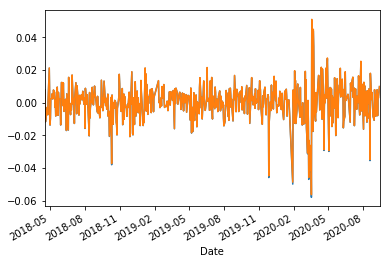

In [6]:
lr['00690'].plot()
r['00690'].plot()

# 從log returns計算累計報酬
## $$TR=\frac{P_T}{P_0}-1$$
## $$=e^{ln(\frac{P_T}{P_0})}-1$$

In [7]:
tr=np.exp(np.cumsum(lr))-1
tr.head()

,00690,00728
Date,,
2018-04-18,NaN,NaN
2018-04-19,0.007706,0.014308
2018-04-20,-0.004080,-0.001022
2018-04-23,-0.009973,-0.012264
2018-04-24,-0.014959,-0.025549


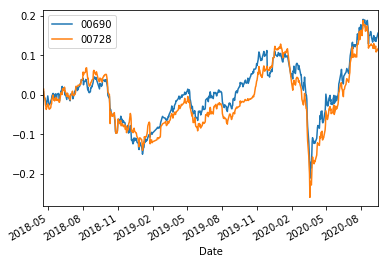

In [8]:
tr.plot()